In [99]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import metrics
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

In [100]:
# Load data from scikit-learn, which returns (data, target)
# note: if you call "boston = load_boston()", it returns a dictionary-like object
data, target = datasets.load_boston(True)

# Split the data into two parts: training data and testing data
train_data,test_data,train_target,test_target = train_test_split(data,(target[:, np.newaxis]), test_size=0.2, random_state=42)


Coefficients:  [[ -1.12463481e-01   3.00810168e-02   4.07309919e-02   2.78676719e+00
   -1.72406347e+01   4.43248784e+00  -6.23998173e-03  -1.44848504e+00
    2.62113793e-01  -1.06390978e-02  -9.16398679e-01   1.24516469e-02
   -5.09349120e-01]]

Intercepts:  [ 30.28894834]

Training Error:  10.8207870483
Testing Error:  12.1557134648


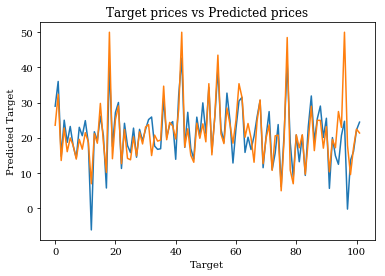

(102, 1)
(102, 13)
(1, 13)


In [252]:
# Sources

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://matplotlib.org/api/pyplot_api.html
# https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
# http://www.bigdataexaminer.com/2016/03/31/how-to-run-linear-regression-in-python-scikit-learn/
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

# functions

# Square error function
def sqrMean(X, Y):
    #return (metrics.mean_squared_error(X, Y) * .5)
    return (np.mean((X - Y) ** 2)) / 2

# Task 1-1: use linear regression in sklearn

# creating linear regression model object with default parameters
model = linear_model.LinearRegression()

# fitting model with training X,Y data. We are training the model with the training data at this time
model.fit(train_data, train_target)

# Task 1-2: show intercept and coefficients
print()
print('Coefficients: ', model.coef_)
print()
print('Intercepts: ', model.intercept_)

# Here we are getting a prediction using the training data
trained_results = model.predict(train_data)

# Here we are getting a prediction using the testing data
tested_results = model.predict(test_data)

# get error from both data sets 
train_error = sqrMean(train_target, trained_results)
test_error = sqrMean(test_target, tested_results)

# Task 1-3: show errors on training dataset and testing dataset

# Print out both data sets error based on model fitted using the training data
print()
print('Training Error: ', train_error)
print('Testing Error: ', test_error)

# Task 1-4: show plot a figure to show your predictions and real prices on the testing data set

# set x axis label
plt.xlabel("Target")
# set y axis label
plt.ylabel("Predicted Target")
# set chart title
plt.title("Target prices vs Predicted prices")
# plot the predicted values of the test data
plt.plot(model.predict(np.matrix(test_data)))
# plot the true values of the test data
plt.plot(np.matrix(test_target))
# show the chart
plt.show()

print ((np.matrix(model.predict(np.matrix(test_data)))).shape)
print ((test_data).shape)
print (np.matrix(model.coef_).shape)


Intercepts:  [ 30.28894834]

Coefficients:  [[ -1.12463481e-01]
 [  3.00810168e-02]
 [  4.07309919e-02]
 [  2.78676719e+00]
 [ -1.72406347e+01]
 [  4.43248784e+00]
 [ -6.23998173e-03]
 [ -1.44848504e+00]
 [  2.62113793e-01]
 [ -1.06390978e-02]
 [ -9.16398679e-01]
 [  1.24516469e-02]
 [ -5.09349120e-01]]


Training Error:  [[ 10.82078705]]
Testing Error:  [[ 12.15571346]]

(1, 102)



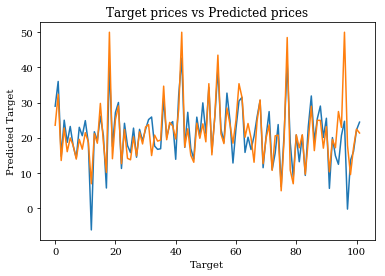

In [290]:
# Sources

# http://anwarruff.com/normal-equation/

# loss function of linear regression
def lossFunc(N, features, targets, weights):
    t = targets
    X = features
    w = weights
    partial_mean = (1/(2*N))
    Xw = np.matmul(X, w)
    offset = np.subtract(t, Xw)
    return (partial_mean * np.matmul(np.transpose(offset), offset))

# Task 2-1: Implement a function solving normal equation 

# Inputs: Training data (X) and training label (target/y)
# Output: Weights
def myNormalEqualFun(X,y):
    # get transpose of X
    Xt = np.transpose(X)
    #w = np.matmul((np.matmul((np.matmul(Xt, X) ** -1), Xt)), y)
    # The x transpose is being multiplied by x and that result is to the power of -1
    w_partial_one = np.linalg.inv(np.dot(Xt, X))
    # the other part of the equation consist of multiplying the x transpose by the target vector
    w_partial_two = np.dot(w_partial_one, Xt)
    # lastly, we multiply both parts 
    w = np.dot(w_partial_two, y)
    # return the weights
    return w
    
# Task 2-2: Implement a function performing prediction

# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    
    # print(X.shape)
    # print()
    # print(w.shape)
    print()
    print((np.dot(np.transpose(np.matrix(w)), np.transpose(np.matrix(X)))).shape)
    print()
    
    #print(np.dot(np.transpose(w), np.transpose(X)))
    # return np.dot(np.transpose(w), X) 
    #**************************************************************************transpose does nothing
    return np.transpose(np.dot(np.transpose(np.matrix(w)), np.transpose(np.matrix(X))))

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myNormalEqual to train the model and get weights
w = myNormalEqualFun(train_data_intercept,train_target)

# print('debug2')
# print((np.transpose(np.matrix(w))).shape)
# # print(w.shape)
# print('debug2')

# Task 2-3: show intercept and coefficents
print()
print('Intercepts: ', w[0])
print()
print('Coefficients: ', w[1:])
print()

# Task 2-4: show errors on training dataset and testing dataset
training_error = lossFunc(len(train_target), train_data_intercept, train_target, w)
testing_error = lossFunc(len(test_target), test_data_intercept, test_target, w)

print()
print('Training Error: ', training_error)
print('Testing Error: ', testing_error)

# Task 2-5: show plot a figure to show your predictions and real prices on the testing dataset

# print('debug')
# print((np.transpose(train_data_intercept)).shape)
# # print(train_data_intercept.shape)
# print('debug')

# set x axis label.snp.tr
plt.xlabel("Target")
# set y axis label
plt.ylabel("Predicted Target")
# set chart title
plt.title("Target prices vs Predicted prices")
# plot the predicted values of the test data
#*************************************************************************************************************************
plt.plot(np.matrix(myPredictFun(test_data_intercept, w)))
# plot the true values of the test data
plt.plot(np.matrix(test_target))
# show the chart
plt.show()

In [ ]:
# Feature scaling
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)


# Task 3-1: Implement a function performing gradient descent
# Inputs: Training data, training label, leaerning rate, number of iterations
# Output: Weights
def myGradientDescentFun(X,y,learning_rate,numItrs):
    return 

# Task 3-2: Implement a function performing prediction
# Inputs: Testing data and weights
# Output: Predictions
def myPredictFun(X,w):
    return

# Here we insert a column of 1s into training_data and test_data (to be consistent with our lecture slides)
train_data_intercept = np.insert(train_data, 0, 1, axis=1)
test_data_intercept = np.insert(test_data, 0, 1, axis=1)

# Here we call myGradientDescentFun to train the model and get weights
# Note: you need to figure out good learning rate value and the number of iterations
w = myGradientDescentFun(train_data_intercept,train_target,0,0)

# Task 3-3: show intercept and coefficents


# Task 3-4: show errors on training dataset and testing dataset


# Task 3-5: show plot a figure to show your predictions and real prices on the testing dataset